## Titanic survived Project

### Project Description

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Attribute Information
Passenger id- Unique Id of the passenger
Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Survived- Survived (0 = No; 1 = Yes)
Name- Name of the passenger
Sex- Sex of the passenger (Male, Female)
Age- Age of the passenger
Sibsp- Number of Siblings/Spouses Aboard
Parch- Number of Parents/Children Aboard
Ticket- Ticket Number
Fare- Passenger Fare (British pound)
Cabin- Cabin
Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The dataset has both numerical data and categorical in the dataset and Target variable is Survived

In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The dataset has dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are null values in Sex input, Cabin and Embarked

In [8]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [9]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [10]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [11]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [12]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [13]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [14]:
df['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

We can find the occurrences of each unique value in the series from value_count() method
- Age a numerical data we can fill nan with mean or median
- Cabin an object datatype and missing values are 687 out of 891 rows,and so lets drop the column
- Embarked is a categorical data, we can use mode to fill nan 

In [15]:
df.nunique().to_frame('No: of unique values')

,No: of unique values
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


We now know the unique values in each variable

### Handling  Missing Values

In [16]:
df.drop(columns=['Cabin','Name','PassengerId','Ticket'],axis=1,inplace=True)

We are dropping few columns which does add much value for prediction

In [17]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [18]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [19]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

No more null values in the dataset

##### Checking for duplicates

In [20]:
df.duplicated().sum()

111

We have 111 duplicates in the dataset

In [21]:
for col in ['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']:
    has_blank_spaces =df[col].apply(lambda x : ' ' in str(x))
    print(f'{col}: Contain Blank Spaces :{has_blank_spaces.any()}')    


Survived: Contain Blank Spaces :False
Pclass: Contain Blank Spaces :False
Sex: Contain Blank Spaces :False
Age: Contain Blank Spaces :False
SibSp: Contain Blank Spaces :False
Parch: Contain Blank Spaces :False
Fare: Contain Blank Spaces :False
Embarked: Contain Blank Spaces :False


We removed the blank spaces using apply

Blank Spaces are in Name and Ticket we can ignore them as they dont value much for the dataset

In [22]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

The dataset has dtypes: float64(2), int64(5), object(5)

In [23]:
# Checking for Categorical column
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print('\n')

# Check for numerical column:
numerical_col = []
for i in df.dtypes.index:
    if df[i].dtypes !='object':
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)
        

Categorical Columns:  ['Sex', 'Embarked']


Numerical Columns:  ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


### Descriptive Analysis

In [24]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- The count of each variable is 891 indicates no null values
- Mean and standard deviation are widely fluctuating, suggesting significant data variability and dispersion
- The mean and median has is varying, the data may be significantly skewed
- The 3rd quartile and max are widely fluctuating may be dataset has outliers

### Exploratory Analysis and Visualization

#### Univariate Analysis

Survived
0    549
1    342
Name: count, dtype: int64

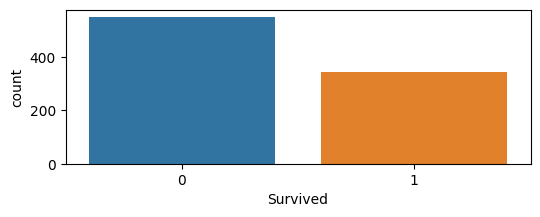

In [25]:
plt.figure(figsize=(6,2))
sns.countplot(x='Survived',data=df)
df['Survived'].value_counts()

- The people survived after titanic crash was 342
- The people who lost their lives were 549

Sex
male      577
female    314
Name: count, dtype: int64

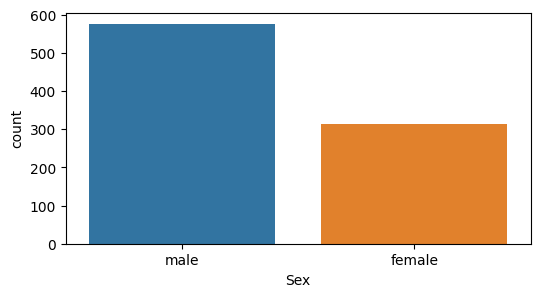

In [26]:
plt.figure(figsize=(6,3))
sns.countplot(x='Sex', data=df)
df['Sex'].value_counts()

- The male count was 577
- The female count was 314

<Axes: xlabel='Sex', ylabel='count'>

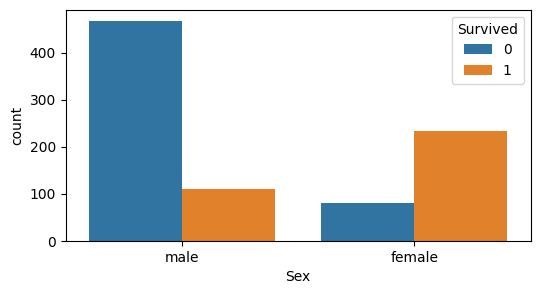

In [27]:
plt.figure(figsize=(6,3))
sns.countplot(x='Sex', hue = 'Survived', data=df)


The male ratio who lost their lives was high

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

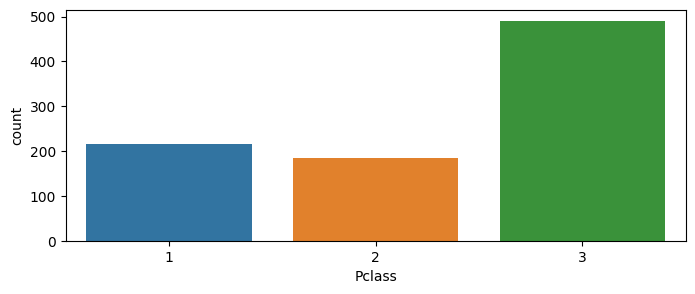

In [28]:
plt.figure(figsize=(8,3))
sns.countplot(x='Pclass', data=df)
df['Pclass'].value_counts()

The passengers in Pclass 3 were high in comparison with Pclass 1 and Pclass 2

<Axes: xlabel='Pclass', ylabel='count'>

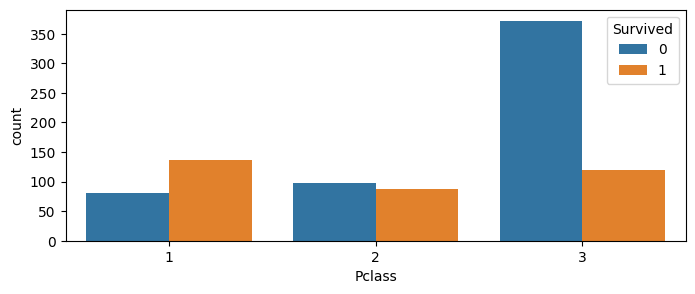

In [29]:
plt.figure(figsize=(8,3))
sns.countplot(x='Pclass', hue = 'Survived', data=df)

Pclass 3 passengers has lowest survival ratio when compared to Pclass 1 and 2

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

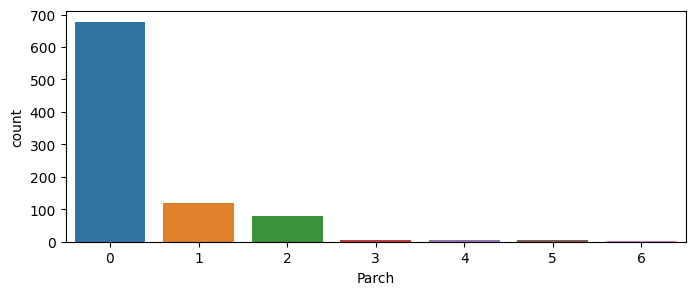

In [30]:
plt.figure(figsize=(8,3))
sns.countplot(x='Parch', data=df)
df['Parch'].value_counts()

- 678 passengers who did not have any parents or children on board, i.e., they were traveling alone
- 118 passengers who have 1 parents or children on board
- 6 indicates that there was 1 passenger who had 6 parents or children on board

<Axes: xlabel='Parch', ylabel='count'>

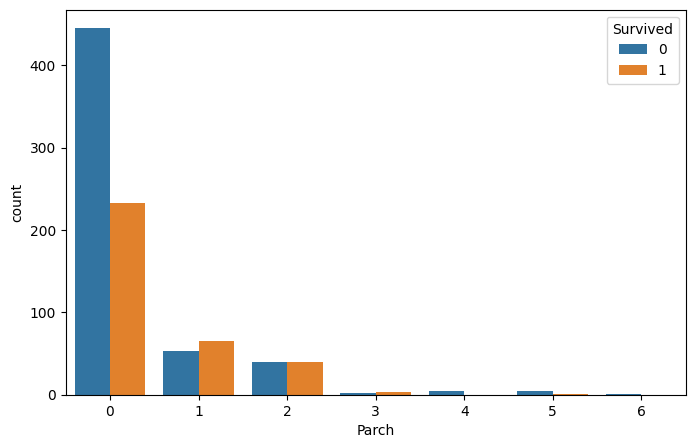

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(x='Parch',hue = 'Survived', data=df)

- The people who are single lost their lives in greater ratio when compared with the one who have parents of children

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

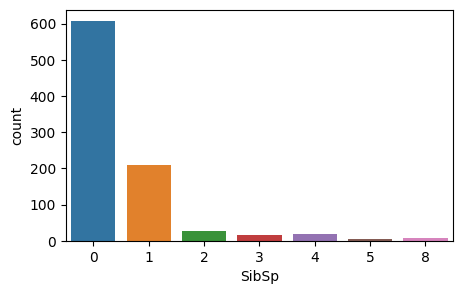

In [32]:
plt.figure(figsize=(5,3))
sns.countplot(x='SibSp', data=df)
df['SibSp'].value_counts()

- 0 indicates that there were 608 passengers who did not have any siblings or spouses on board, they were traveling alone
- 1 represents 209 passengers who had one sibling or spouse on board
- 2 indicates 28 passengers who had two siblings or spouses on board
- 3 represents 16 passengers who had three siblings or spouses on board
- 4 means 18 passengers had four siblings or spouses on board
- 5 means 5 passengers had five siblings or spouses on board
- 8 indicates 7 passengers who had eight siblings or spouses on board, may be where passengers were part of larger families


<Axes: xlabel='SibSp', ylabel='count'>

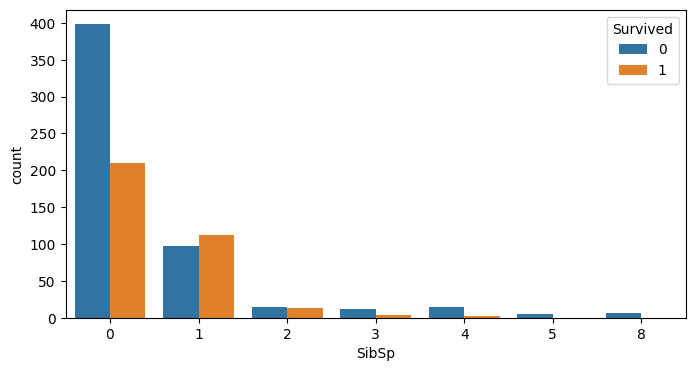

In [33]:
plt.figure(figsize=(8,4))
sns.countplot(x='SibSp',hue = 'Survived', data=df)

- The people who were travelling alone or with smaller family has low survival rate
- SibSp equal to 0, there is a higher chance of survival rate, compared to those traveling with 1 sibling or spouse
- SibSp values of 2,3 and 4 has low survival rate
- SibSp values of 5 and 8 have very few data points, making it difficult to draw conclusions about their survival rates.

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

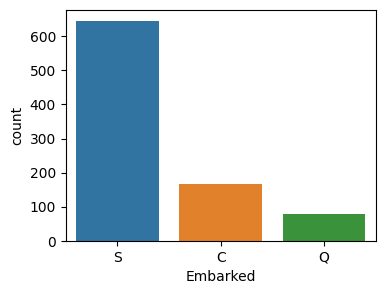

In [34]:
plt.figure(figsize=(4,3))
sns.countplot(x='Embarked', data=df)
df['Embarked'].value_counts()

- 644 passengers boarded the Titanic in Southampton (S)
- 168 passengers boarded the Titanic in Cherbourg (C)
- 77 passengers boarded the Titanic in Queenstown (Q)

<Axes: xlabel='Embarked', ylabel='count'>

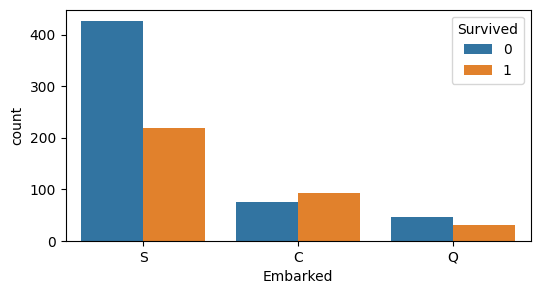

In [35]:
plt.figure(figsize=(6,3))
sns.countplot(x='Embarked',hue = 'Survived', data=df)

- Passengers who boarded from Southampton (S) had a relatively lower survival rate
- Passengers who boarded from Cherbourg (C), the distribution appears more balanced between those who survived and those who did not
- Passengers who boarded from Queenstown (Q)had a lower survival rate

<Figure size 300x300 with 0 Axes>

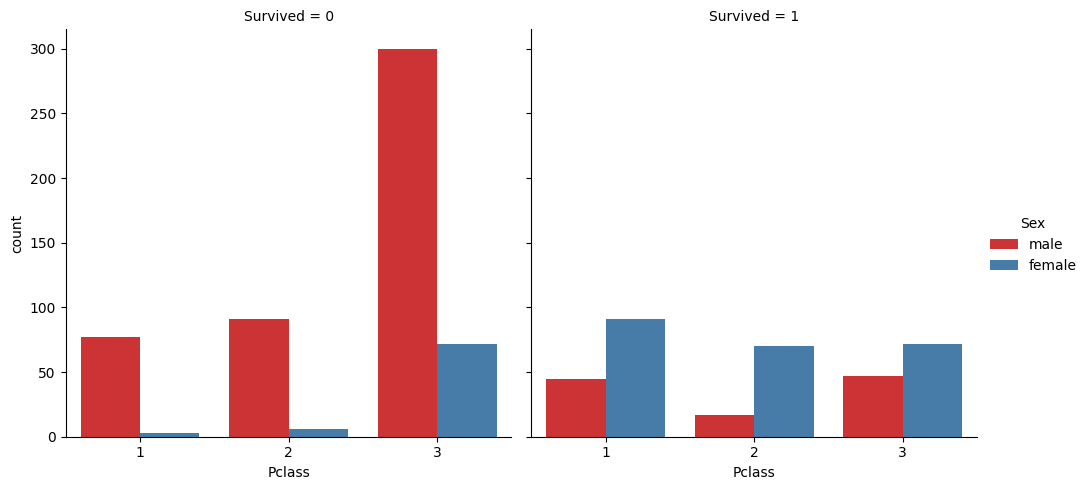

In [36]:
plt.figure(figsize=(3,3))
sns.catplot(x= 'Pclass',hue = 'Sex', col = 'Survived', data = df, kind = 'count', palette = 'Set1')
plt.show()

- Passenger class and gender related survival outcomes
- Column 0 there were more male passengers in the 3rd class ("Pclass") than in the other classes, indicates that a significant number of male passengers in the 3rd class did not survive
- Column 1 the number of female passengers is higher in the 1st and 2nd classes compared to the 3rd class, a larger proportion of female passengers in the higher classes survived

<Figure size 300x200 with 0 Axes>

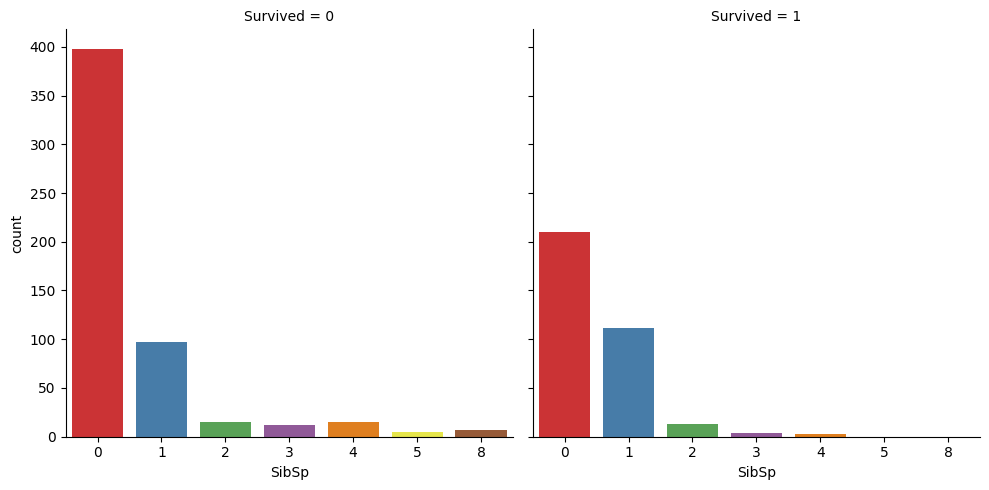

In [37]:
plt.figure(figsize=(3,2))
sns.catplot(x= 'SibSp', col = 'Survived', data = df, kind = 'count', palette = 'Set1')
plt.show()

- Column 0 has majority of passengers who did not have any siblings or spouses on board (SibSp = 0) did not survive.

- Column 1 there is a higher proportion of passengers who survived among those with SibSp = 1 had a relatively higher chance of survival.

- SibSp  2, 3, 4, 5, and 8 have fewer data points, making difficult to draw conclusions about survival rates

<Figure size 300x300 with 0 Axes>

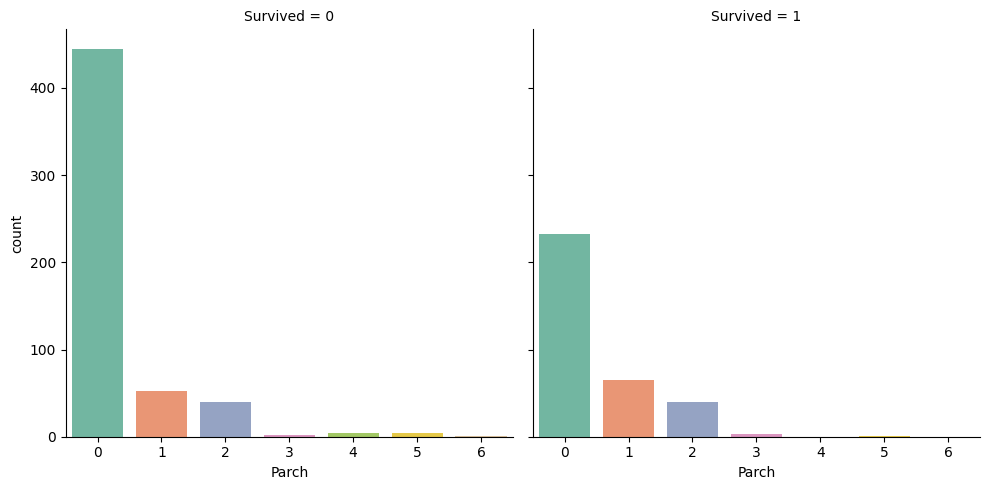

In [38]:
plt.figure(figsize=(3,3))
sns.catplot(x= 'Parch', col = 'Survived', data = df, kind = 'count', palette = 'Set2')
plt.show()

- Column 0 has the majority of passengers who did not have any parents or children on board ie., Parch = 0 did not survive

- Column 1, ie., Parch = 1 there is a relatively higher proportion of passengers who survived

- Parch 2, 3, 4, 5 and 6 have fewer data points making it challenging to draw conclusions about survival rates 

<Figure size 300x300 with 0 Axes>

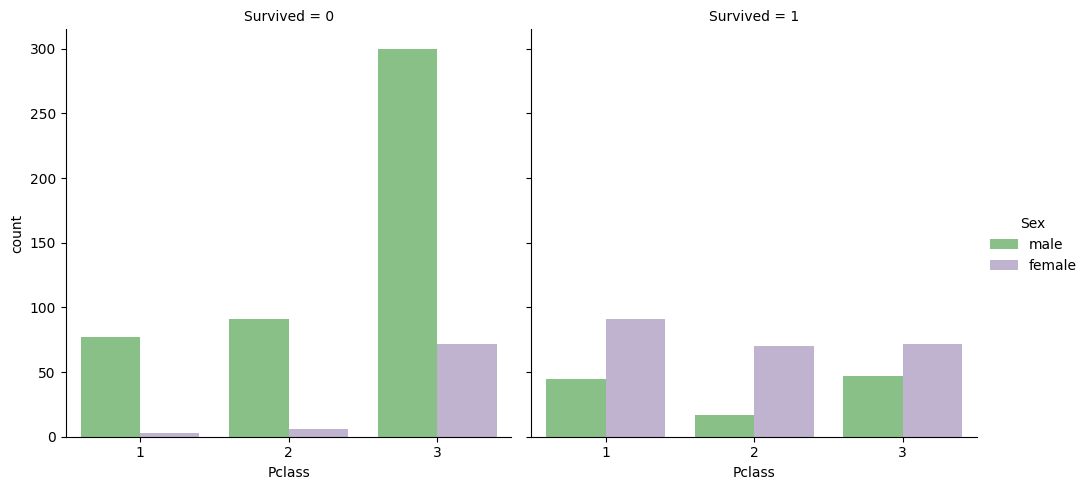

In [39]:
plt.figure(figsize=(3,3))
sns.catplot(x= 'Pclass',hue = 'Sex', col = 'Survived', data = df, kind = 'count', palette = 'Accent')
plt.show()

- Column 0 the majority of passengers who did not have any parents or children on board (Parch = 0) did not survive.

- Column 1 ie., Parch = 1 has relatively higher proportion of passengers who survived 

- Parch2, 3, 4, 5 and 6 have fewer data points, making it challenging to draw conclusions about survival rates 

<Axes: xlabel='Survived', ylabel='Fare'>

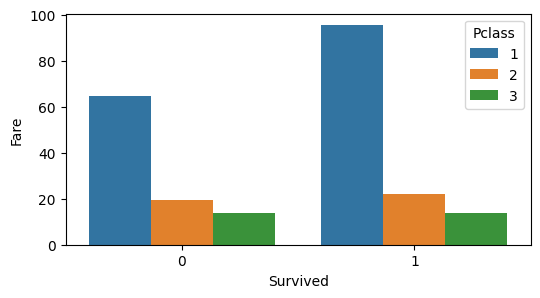

In [40]:
plt.figure(figsize=(6,3))
sns.barplot(data=df, x='Survived', y='Fare', hue='Pclass',ci=None)

- Higher fares associated with the 1st class has greater survival rate in comparison with low fare
- Lower fare has low susrvival rate the bar in green color

On the right side of the graph, you can see the fare distribution for passengers who survived (1). Here, you can also observe variations in fare within each class, with higher fares typically associated with the 1st class. This suggests that passengers who survived paid varying fares depending on their class.



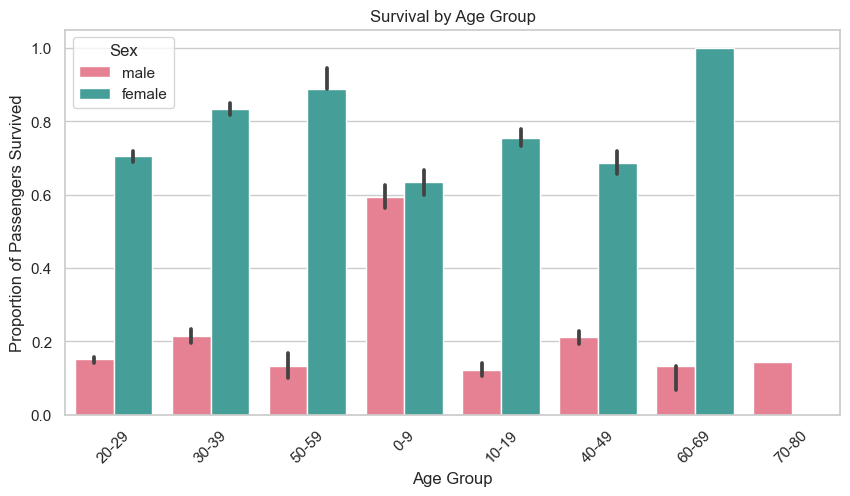

In [41]:
#'AgeGroup' based on age ranges
data_df = df.copy()
data_df['AgeGroup'] = ''
data_df.loc[(df['Age'] >=  0) & (data_df['Age'] < 10), 'AgeGroup'] = '0-9'
data_df.loc[(df['Age'] >= 10) & (data_df['Age'] < 20), 'AgeGroup'] = '10-19'
data_df.loc[(df['Age'] >= 20) & (data_df['Age'] < 30), 'AgeGroup'] = '20-29'
data_df.loc[(df['Age'] >= 30) & (data_df['Age'] < 40), 'AgeGroup'] = '30-39'
data_df.loc[(df['Age'] >= 40) & (data_df['Age'] < 50), 'AgeGroup'] = '40-49'
data_df.loc[(df['Age'] >= 50) & (data_df['Age'] < 60), 'AgeGroup'] = '50-59'
data_df.loc[(df['Age'] >= 60) & (data_df['Age'] < 70), 'AgeGroup'] = '60-69'
data_df.loc[(df['Age'] >= 70) & (data_df['Age'] <= 80), 'AgeGroup'] = '70-80'

# Create a bar plot
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")

sns.barplot(x="AgeGroup", y="Survived", hue='Sex', data=data_df, palette='husl', ci=33)

# Customize the plot
plt.title("Survival by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Proportion of Passengers Survived")
plt.xticks(rotation=45)

# Show the plot
plt.show()


- In most age groups, females generally have higher survival rates compared to males

- Some age groups have notably high survival rates, while others have lower rates

<Axes: xlabel='Age', ylabel='Density'>

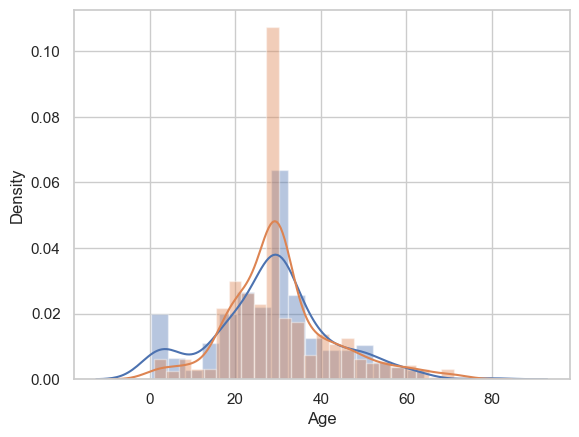

In [42]:
sns.distplot(df[df['Survived']==1]['Age'])
sns.distplot(df[df['Survived']==0]['Age'])

 - By overlaying the two density plots, you can visually compare the age distributions of survivors and non-survivors
 - The age group between 25 to 35 has the lowest survival rate
 - The age group 0-10 has increasing survival rate,This means that children (aged 0-10) were more likely to survive compared to other age groups

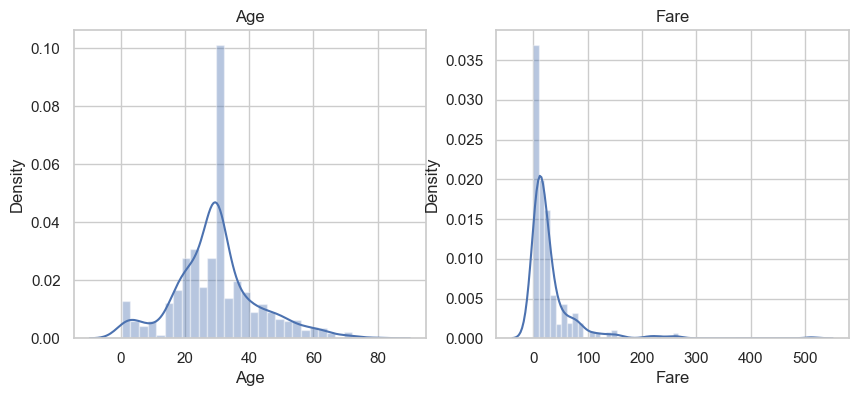

In [43]:
plt.figure(figsize =(10,4))

plt.subplot(121)
sns.distplot(df['Age'])
plt.title('Age')

plt.subplot(122)
sns.distplot(df['Fare'])
plt.title('Fare')

plt.show()

- We can see age group distribution which is normally distributed
- The Fare distribution plot is right skewed may have outliers or unusual fare patterns showing different economy diversity

In [44]:
skewness = df[['Age','Fare']].skew()

In [45]:
sk = np.cbrt(skewness)
sk

Age     0.757401
Fare    1.685378
dtype: float64

- Fare is positively skewed

In [46]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


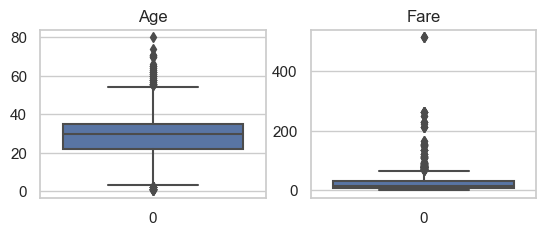

In [47]:
plt.subplot(221)
sns.boxplot(df['Age'])
plt.title('Age')

plt.subplot(222)
sns.boxplot(df['Fare'])
plt.title('Fare')

plt.show()

- We have outliers in the features

##### Lets remove outliers from the variables

In [48]:
upper_limit = df['Fare'].mean() + 3 * df['Fare'].std()
lower_limit = df['Fare'].mean() - 3 * df['Fare'].std()

In [49]:
upper_limit 

181.2844937601173

In [50]:
lower_limit

-116.87607782296804

In [51]:
df[(df['Fare'] > 181.284) | (df['Fare'] < -116.87)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
27,0,1,male,19.000000,3,2,263.0000,S
88,1,1,female,23.000000,3,2,263.0000,S
118,0,1,male,24.000000,0,1,247.5208,C
258,1,1,female,35.000000,0,0,512.3292,C
299,1,1,female,50.000000,0,1,247.5208,C
311,1,1,female,18.000000,2,2,262.3750,C
341,1,1,female,24.000000,3,2,263.0000,S
377,0,1,male,27.000000,0,2,211.5000,C
380,1,1,female,42.000000,0,0,227.5250,C
438,0,1,male,64.000000,1,4,263.0000,S


In [52]:
df['Fare'] = np.where(
         df['Fare'] >upper_limit,
         upper_limit,
         np.where(df['Fare'] < lower_limit,
         lower_limit,
         df['Fare'])
)

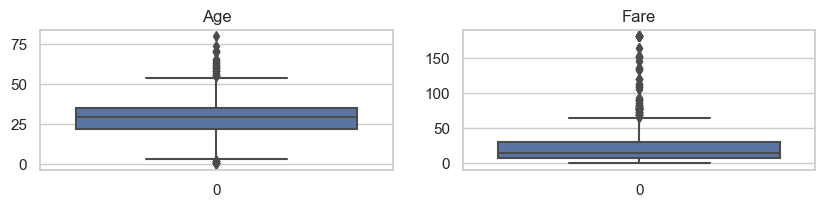

In [53]:
plt.figure(figsize =(10,4))

plt.subplot(221)
sns.boxplot(df['Age'])
plt.title('Age')

plt.subplot(222)
sns.boxplot(df['Fare'])
plt.title('Fare')

plt.show()

In [54]:
upper_limit = df['Age'].mean() + 3 * df['Age'].std()
lower_limit = df['Age'].mean() - 3 * df['Age'].std()

In [55]:
upper_limit

68.70516332506747

In [56]:
lower_limit

-9.306928030949827

In [57]:
df[(df['Age'] > 68.71) | (df['Age'] <-9.31 )]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
96,0,1,male,71.0,0,0,34.6542,C
116,0,3,male,70.5,0,0,7.7500,Q
493,0,1,male,71.0,0,0,49.5042,C
630,1,1,male,80.0,0,0,30.0000,S
672,0,2,male,70.0,0,0,10.5000,S
745,0,1,male,70.0,1,1,71.0000,S
851,0,3,male,74.0,0,0,7.7750,S


In [58]:
df['Fare'] = np.where(
         df['Fare'] >upper_limit,
         upper_limit,
         np.where(df['Fare'] < lower_limit,
         lower_limit,
         df['Fare'])
)

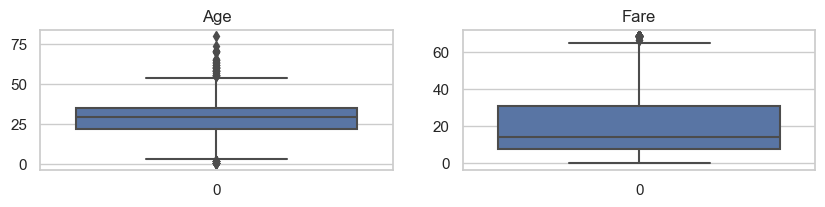

In [71]:
plt.figure(figsize =(10,4))
plt.subplot(221)
sns.boxplot(df['Age'])
plt.title('Age')


plt.subplot(222)
sns.boxplot(df['Fare'])
plt.title('Fare')

plt.show()

We alomost removed the outliers

In [60]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,24.441873
std,0.486592,0.836071,13.002015,1.102743,0.806057,21.294288
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,68.705163


### Encoding Categorical Columns

In [61]:
df.replace({'Sex':{'male':0, 'female':1},'Embarked':{'S':0, 'C':1,'Q':2}},inplace=True)

- We are encoding the Categorical variables Female=1 and Male =0 
- Emabarked is also encoded with 0,1, 2

In [62]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.250000,0
1,1,1,1,38.0,1,0,68.705163,1
2,1,3,1,26.0,0,0,7.925000,0
3,1,1,1,35.0,1,0,53.100000,0
4,0,3,0,35.0,0,0,8.050000,0


<Axes: >

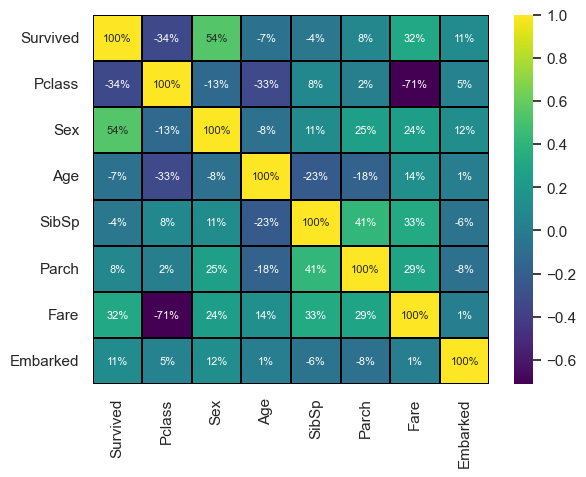

In [63]:
corr = df.corr()
sns.heatmap(corr,fmt='.0%',annot = True,linecolor='black',annot_kws={'size': 8},linewidth=0.09,cmap ='viridis')

- we can see that there are some strong positive and negative correlations between different features

- For instance, Pclass is strongly neagatively correlated with Fare that is -71%


In [64]:
corr['Survived'].sort_values(ascending = False)

Survived    1.000000
Sex         0.543351
Fare        0.316743
Embarked    0.106811
Parch       0.081629
SibSp      -0.035322
Age        -0.069809
Pclass     -0.338481
Name: Survived, dtype: float64

- Sex and Fare is fairly correlated with the Target variable

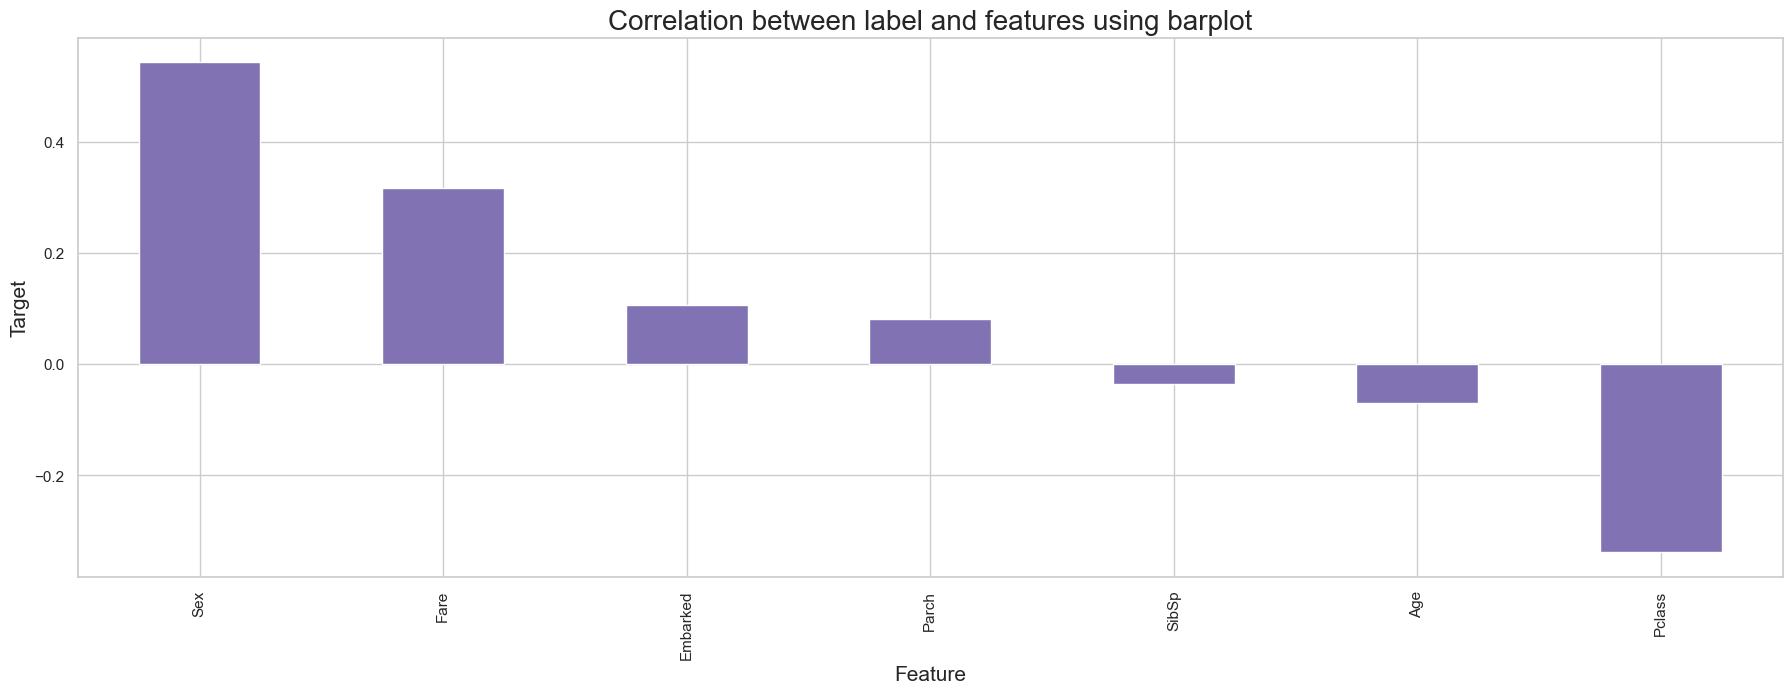

In [72]:
plt.figure(figsize = (22,7))
df.corr()['Survived'].sort_values(ascending = False).drop(['Survived']).plot(kind='bar',color='m')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target',fontsize = 15)
plt.title('Correlation between label and features using barplot', fontsize = 20)
plt.show()

- Sex and Fare is positively correlated with Target 
- Pclass, Age is negatively correlated with Target

### Separating inputs from the Target variables

In [66]:
x=df.drop('Survived',axis=1)
y=df['Survived']

#### Standardization the data

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.827377,-0.737695,-0.592481,0.432793,-0.473674,-0.807800,-0.568837
1,-1.566107,1.355574,0.638789,0.432793,-0.473674,2.079814,1.005181
2,0.827377,1.355574,-0.284663,-0.474545,-0.473674,-0.776084,-0.568837
3,-1.566107,1.355574,0.407926,0.432793,-0.473674,1.346569,-0.568837
4,0.827377,-0.737695,0.407926,-0.474545,-0.473674,-0.770210,-0.568837
...,...,...,...,...,...,...,...
886,-0.369365,-0.737695,-0.207709,-0.474545,-0.473674,-0.537623,-0.568837
887,-1.566107,1.355574,-0.823344,-0.474545,-0.473674,0.261162,-0.568837
888,0.827377,1.355574,0.000000,0.432793,2.008933,-0.046605,-0.568837
889,-1.566107,-0.737695,-0.284663,-0.474545,-0.473674,0.261162,1.005181


In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif values'] =[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif['Features'] =x.columns

vif

,vif values,Features
0,2.945104,Pclass
1,1.130639,Sex
2,1.203200,Age
3,1.588082,SibSp
4,1.372078,Parch
5,3.260995,Fare
6,1.050881,Embarked


- The vif values are less than 5 and we are keeping all the variables in the dataset

In [69]:
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

- The target varibles indicates the number of survived (1) and nonsurvived(0)

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [74]:
maxAccu = 0
maxRs = 0                      
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.30, random_state=i)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred = rf.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is ', maxAccu, 'at random_state', maxRS)


Best accuracy is  0.8507462686567164 at random_state 150


#### Splitting the data into x and y train

In [75]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.20, random_state=maxRS)

In [76]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [77]:
# Checking accuracy for RandomForestClassifier
RFC = RandomForestClassifier()                   
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8491620111731844
[[99 11]
 [16 53]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       110
           1       0.83      0.77      0.80        69

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



In [78]:
# Checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8603351955307262
[[100  10]
 [ 15  54]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       110
           1       0.84      0.78      0.81        69

    accuracy                           0.86       179
   macro avg       0.86      0.85      0.85       179
weighted avg       0.86      0.86      0.86       179



In [79]:
# Checking accuracy for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8770949720670391
[[105   5]
 [ 17  52]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.91       110
           1       0.91      0.75      0.83        69

    accuracy                           0.88       179
   macro avg       0.89      0.85      0.87       179
weighted avg       0.88      0.88      0.87       179



In [80]:
# Checking accuracy for AdaBoostClassifier
ABC = AdaBoostClassifier()
ABC .fit(x_train,y_train)
predABC  = ABC .predict(x_test)
print(accuracy_score(y_test,predABC ))
print(confusion_matrix(y_test,predABC ))
print(classification_report(y_test,predABC ))

0.8603351955307262
[[98 12]
 [13 56]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       110
           1       0.82      0.81      0.82        69

    accuracy                           0.86       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.86      0.86      0.86       179



In [81]:
# Checking accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8770949720670391
[[102   8]
 [ 14  55]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       110
           1       0.87      0.80      0.83        69

    accuracy                           0.88       179
   macro avg       0.88      0.86      0.87       179
weighted avg       0.88      0.88      0.88       179



In [82]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8603351955307262
[[105   5]
 [ 20  49]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       110
           1       0.91      0.71      0.80        69

    accuracy                           0.86       179
   macro avg       0.87      0.83      0.85       179
weighted avg       0.87      0.86      0.86       179



In [83]:
# Checking accuracy for ExtraTreesClassifier
ET = BaggingClassifier()
ET.fit(x_train,y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.8715083798882681
[[103   7]
 [ 16  53]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       110
           1       0.88      0.77      0.82        69

    accuracy                           0.87       179
   macro avg       0.87      0.85      0.86       179
weighted avg       0.87      0.87      0.87       179



In [84]:
from sklearn.model_selection import cross_val_score

In [85]:
score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predRFC)-score.mean())

[0.77094972 0.80337079 0.85393258 0.79213483 0.82022472]
0.8081225284037412
Difference between Accuracy score and cross validation is:  0.041039482769443136


In [86]:
# Checking cv score for LogisticRegression
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predLR)-score.mean())

[0.7877095  0.78089888 0.7752809  0.76966292 0.81460674]
0.7856317870817902
Difference between Accuracy score and cross validation is:  0.07470340844893608


In [87]:
# Checking cv score for GradientBoosingClassifier
score = cross_val_score(GB,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predGB)-score.mean())

[0.79888268 0.80898876 0.83146067 0.80898876 0.84831461]
0.819327098110602
Difference between Accuracy score and cross validation is:  0.05776787395643712


In [88]:
# Checking cv score fro Support Vector Machine Classifier
score = cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predsvc)-score.mean())

[0.83798883 0.83146067 0.81460674 0.79213483 0.85955056]
0.8271483271608814
Difference between Accuracy score and cross validation is:  0.03318686836984486


In [89]:
# Checking cv score fro AdaBoostClassifier
score = cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predABC)-score.mean())

[0.73743017 0.80898876 0.80337079 0.83707865 0.82022472]
0.801418617789216
Difference between Accuracy score and cross validation is:  0.05891657774151027


In [90]:
# Checking cv score fro RandomForestClassifier
score = cross_val_score(BC,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predBC)-score.mean())

[0.7877095  0.78651685 0.86516854 0.76404494 0.8258427 ]
0.8058565061829139
Difference between Accuracy score and cross validation is:  0.07123846588412519


In [91]:
# Checking cv score fro RandomForestClassifier
score = cross_val_score(ET,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predET)-score.mean())

[0.78212291 0.82022472 0.87078652 0.78089888 0.80337079]
0.8114807607808674
Difference between Accuracy score and cross validation is:  0.06002761910740073


The best model is SVC

In [92]:
parameters = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.001, 0.01, 0.1]}

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
GCV = GridSearchCV(SVC(),parameters,cv=5)

In [95]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1],
                         'kernel': ['linear', 'rbf']})

In [96]:
GCV.best_params_   

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [97]:
best_model = GCV.best_estimator_

In [98]:
best_model

SVC(C=10, gamma=0.1)

In [99]:
Final_model = SVC(C= 10, gamma= 0.001, kernel= 'rbf')
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(f"Accuracy: {acc * 100:.2f}%")

Accuracy: 81.01%


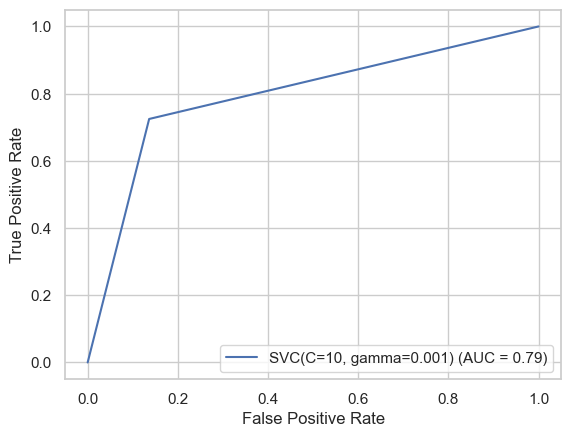

In [100]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr, roc_auc=roc_auc,estimator_name = Final_model)
display.plot()

In [101]:
import joblib
joblib.dump(Final_model,'Titanic_survive_ Analysis.pkl') 

['Titanic_survive_ Analysis.pkl']

In [102]:
model = joblib.load('Titanic_survive_ Analysis.pkl')   
#Prediction

prediction = model.predict(x_test)
prediction

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0], dtype=int64)

In [103]:
svc=np.array(y_test)
df = pd.DataFrame()
df['Predicted'] =prediction
df['Original'] = svc
df

,Predicted,Original
0,0,0
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
174,0,0
175,0,0
176,1,0
177,0,0
